# Risk & Return Exercise

In [21]:
import pandas as pd
import scipy.stats

In [22]:
df = pd.read_excel('~/Downloads/Historical_monthly_return_data.xlsx', 
    sheet_name='Sheet1', 
    index_col=0,
    skiprows=[0, 1]) # skip the row with the column titles
df.head()

,S&P 500,MSFT,WBA,TSLA
Date,,,,
2010-12-01,1257.640015,23.976345,34.562576,26.629999
2011-01-03,1286.119995,23.821714,35.875526,24.100000
2011-02-01,1327.219971,22.968760,38.607777,23.889999
2011-03-01,1325.829956,21.940435,35.757179,27.750000
2011-04-01,1363.609985,22.398430,38.055477,27.600000


## PART 1

Compute the monthly returns using the adjusted closing prices

In [23]:
returns = df.pct_change()
# drop first row from your DataFrame
returns.drop(returns.index[0], inplace=True)
returns.head()

,S&P 500,MSFT,WBA,TSLA
Date,,,,
2011-01-03,0.022646,-0.006449,0.037988,-0.095006
2011-02-01,0.031957,-0.035806,0.076159,-0.008714
2011-03-01,-0.001047,-0.044771,-0.073835,0.161574
2011-04-01,0.028495,0.020874,0.064275,-0.005405
2011-05-02,-0.013501,-0.028783,0.025352,0.092029


## PART 2

Compute the average monthly return

In [24]:
returns.mean()

S&P 500    0.008684
MSFT       0.015728
WBA        0.017635
TSLA       0.048767
dtype: float64

Convert the monthly statistics to annual statistics

In [29]:
returns.mean() * 12

S&P 500    0.104208
MSFT       0.188735
WBA        0.211618
TSLA       0.585202
dtype: float64

Compute geometric mean

In [34]:
geomeans = scipy.stats.gmean(returns + 1) - 1
geomeans

array([0.00812688, 0.0138421 , 0.014986  , 0.03732371])

Convert the monthly statistics to annual statistics

In [43]:
annual_returns = (1 + geomeans)**12 - 1
annual_returns

array([0.10200193, 0.17935316, 0.19542023, 0.55228562])

Compute the monthly standard deviation

In [28]:

scipy.stats.tstd(returns)

array([0.03377063, 0.06302307, 0.07480702, 0.16631516])

Convert the monthly statistics to annual statistic

In [44]:
annual_risk = scipy.stats.tstd(returns) * 12**0.5
annual_risk

array([0.11698491, 0.21831833, 0.25913913, 0.57613262])

## PART 3

Create a scatter plot that shows the mean annual returns and standard deviations in the average return and volatility space.

Volatility should go on the x-axis and average return should go on the y-axis.

In [49]:
df.columns.array

<PandasArray>
['S&P 500', 'MSFT', 'WBA', 'TSLA']
Length: 4, dtype: object

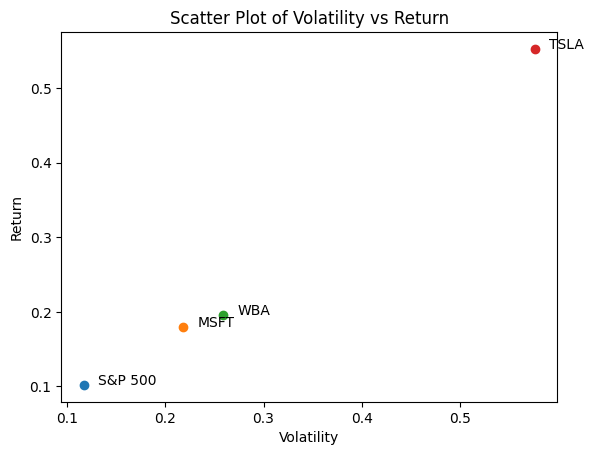

In [50]:
import matplotlib.pyplot as plt

#create figure
fig=plt.figure()
labels = df.columns.array

for x, y, label in zip(annual_risk, annual_returns, labels):
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(10,0), textcoords="offset points")

#labelling the axes
plt.xlabel('Volatility')
plt.ylabel('Return')

#optional title
plt.title('Scatter Plot of Volatility vs Return')

#showing plot
plt.show()